In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize,scale

In [2]:
# importing dataset
df = pd.read_csv('diabetes.csv')
print(df.head(),df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   (768, 9)


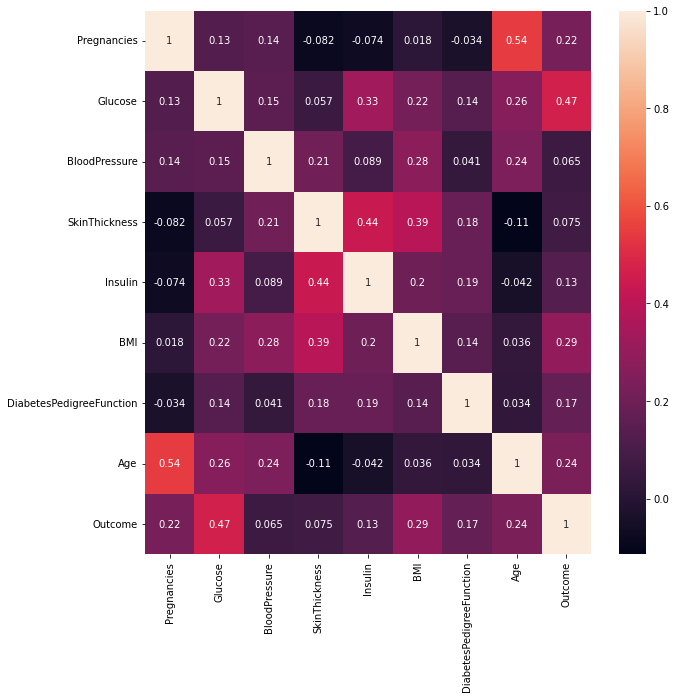

In [3]:
# Plotting the correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [4]:
#Separating the dataset in features and Target varibles
features = np.asmatrix(df[['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
Target = np.asmatrix(df['Outcome']).T

In [5]:
#Normalizing the data using minmax normalization
features = (features - np.min(features)) / (np.max(features) - np.min(features))

In [6]:
#Splitting the data in training, validation and testing sets and transposing them for ease of calculations
train_x, rem_x, train_y, rem_y = train_test_split(features,Target, test_size=0.4,random_state=1)
val_x, test_x, val_y, test_y = train_test_split(rem_x, rem_y, test_size=0.5, random_state=1)

train_x = train_x.T
test_x = test_x.T
train_y =train_y.T
test_y = test_y.T
val_x = val_x.T
val_y = val_y.T

In [7]:
print('Total number of data items:', len(df))
print('\nNumber of data points in the training dataset:', train_x.shape[1])
print('\nNumber of data points in the validation dataset:', val_x.shape[1])
print('\nNumber of data points in the test dataset:', test_x.shape[1])
print('\nShape of the training dataset:', train_x.shape)
print('\nShape of the validation dataset:', val_x.shape)
print('\nShape of the test dataset:', test_x.shape)
print('\n Training dataset type:', type(train_x))
print('\n Validation dataset type:', type(val_x))
print('\n Test dataset type:', type(test_x))

Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the validation dataset: 154

Number of data points in the test dataset: 154

Shape of the training dataset: (8, 460)

Shape of the validation dataset: (8, 154)

Shape of the test dataset: (8, 154)

 Training dataset type: <class 'numpy.matrix'>

 Validation dataset type: <class 'numpy.matrix'>

 Test dataset type: <class 'numpy.matrix'>


In [8]:
#Initializing the weights and bias
wt = np.full((train_x.shape[0],1),0.01)
b = 0.0
#intiatilizing the no of iterations(epochs)
epochs = 10000
#learning rate(alpha)
alpha = 7
#Array of costs
cost_list = []

In [9]:
# Definining the sigmoid function
def sigmoid(z):
    y_head = 1 / (1+np.exp(-z))
    return y_head

In [10]:
for i in range(epochs):

    y_pred = sigmoid(np.dot(wt.T, train_x)+b)
    
    #Converting numpy matrices into arrays for ease of calculation
    y_p = np.squeeze(np.asarray(y_pred))
    y_t = np.squeeze(np.asarray(train_y))
    
    #Storing cost for plotting graphs of cost vs epochs
    loss = -y_t*np.log(y_p) - (1-y_t)*np.log(1-y_p)
    cost = (np.sum(loss)) / train_x.shape[1]
    if(i%10 == 0):
        cost_list.append(cost)

    gradient = np.dot(train_x, (y_pred - train_y).T)/train_x.shape[1]
    db = np.sum(y_pred-train_y)/train_x.shape[1]
    
    wt = wt - alpha * gradient
    b = b - alpha * db

In [11]:
# Printing the weights and bias
print(wt, b)

[[ 10.47924303]
 [ 30.4520496 ]
 [-12.31135106]
 [  4.48439849]
 [  0.07522032]
 [ 45.10880099]
 [  0.76524334]
 [ 22.93370908]] -6.984253001502657


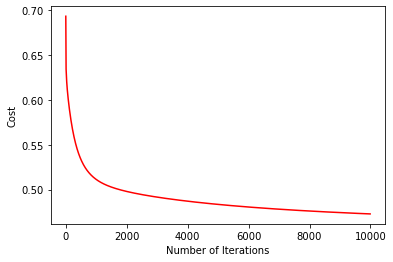

In [12]:
plt.plot(list(range(0,epochs,10)), cost_list, '-r')
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:
# Training accuracy
y_pred = sigmoid(np.dot(wt.T, train_x)+b)
Y_prediction = np.zeros((1,train_x.shape[1]))
Y_prediction = np.array([1 if element > 0.5 else 0 for element in y_pred.T])
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - train_y)) * 100))

train accuracy: 77.3913043478261 %


In [14]:
# Validation accuracy
y_pred = sigmoid(np.dot(wt.T, val_x)+b)
Y_prediction = np.zeros((1,val_x.shape[1]))
Y_prediction = np.array([1 if element > 0.5 else 0 for element in y_pred.T])
print("val accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - val_y)) * 100))

val accuracy: 78.57142857142857 %


In [15]:
# Testing accuracy
y_pred = sigmoid(np.dot(wt.T, test_x)+b)
Y_prediction = np.zeros((1,test_x.shape[1]))
Y_prediction = np.array([1 if element > 0.5 else 0 for element in y_pred.T])
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction - test_y)) * 100))

test accuracy: 76.62337662337663 %
